# CT19 Assignment 1

In [8]:
import automata
import graphviz

# https://caleb531.github.io/automata/api/
from automata.fa.dfa import DFA
from automata.fa.nfa import NFA
from automata.regex import regex

In [9]:
# DFA which matches all binary strings ending in an odd number of '1's
my_dfa = DFA(
    states={"q0", "q1", "q2"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q0", "1": "q1"},
        "q1": {"0": "q0", "1": "q2"},
        "q2": {"0": "q2", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q1"},
)
digraph = my_dfa.show_diagram()

In [12]:
print(digraph.clear)
# digraph.draw("dfa.png", prog="dot")

<bound method AGraph.clear of <AGraph <Swig Object of type 'Agraph_t *' at 0x72e6b7f96f40>>>


## Exercise 1: Regular Expressions

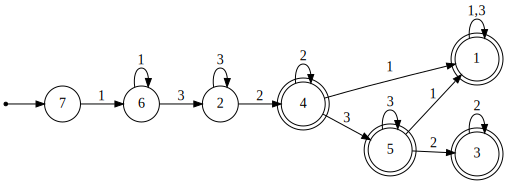

In [4]:
# defines the alphabet to be used
l = set(["0", "1", "2", "3"])

r1 = "1(1*|2*)3*(2*|3)1*2(1|3)*2*"
r2 = "1*3(2|3)*2*(1|3)*(1|3)*"

nfa_r1 = NFA.from_regex(r1, input_symbols=l)
nfa_r2 = NFA.from_regex(r2, input_symbols=l)

dfa_e1ai = DFA.from_nfa(nfa_r1.intersection(nfa_r2))

dfa_e1ai.show_diagram()

In [5]:
print(dfa_e1ai.accepts_input("132"))
print(dfa_e1ai.accepts_input("11332213"))

print(dfa_e1ai.accepts_input("132222322221"))

print("A random accepted world of length 30:", dfa_e1ai.random_word(30))

True
True
False
A random accepted world of length 30: 133321311113333333113111313331


In [6]:
cdfa_e1ai = dfa_e1ai.complement()

cdfa_e1ai.show_diagram()
dfa_e1ai.accepts_input(cdfa_e1ai.random_word(8))

False

### An automarker function for E1ai

In [177]:
def e1a():
    l = set(["0", "1", "2", "3"])
    r1 = "1(1*|2*)3*(2*|3)1*2(1|3)*2*"
    r2 = "1*3(2|3)*2*(1|3)*(1|3)*"

    nfa_r1 = NFA.from_regex(r1, input_symbols=l)
    nfa_r2 = NFA.from_regex(r2, input_symbols=l)

    return nfa_r1, nfa_r2

def e1ai(w : str):
    nfa_r1, nfa_r2 = e1a()
    dfa_e1ai = DFA.from_nfa(nfa_r1.intersection(nfa_r2))

    return dfa_e1ai.accepts_input(w)

In [178]:
print(e1ai("132"))
print(e1ai("11332213"))

print(e1ai("11332212"))

# ge strings that we know will NOT be accepted (accepted by the complement!)
nfa_r1, nfa_r2 = e1a()
cdfa_e1ai = DFA.from_nfa(nfa_r1.intersection(nfa_r2)).complement()
for i in range(10):
    rnd_w = cdfa_e1ai.random_word(8)
    print(f"Word {rnd_w}:", e1ai(rnd_w))


True
True
False
Word 03213310: False
Word 02233331: False
Word 00031102: False
Word 30032020: False
Word 11030211: False
Word 20131320: False
Word 30110112: False
Word 31032122: False
Word 13103111: False
Word 00221121: False


In [189]:
f = locals()['e1ai']

f('132')


True